In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 📥 Step 2: Load Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 📊 Step 3: Basic Info & Preprocessing
print("\nDataset Info:\n")
df.info()
print("\nNull values:\n", df.isnull().sum())

# Drop CustomerID (not needed for clustering)
df = df.drop('CustomerID', axis=1)

# Encode Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Null values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


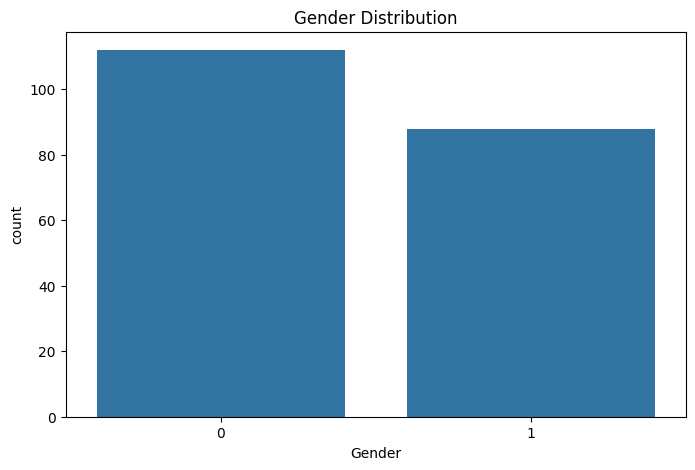

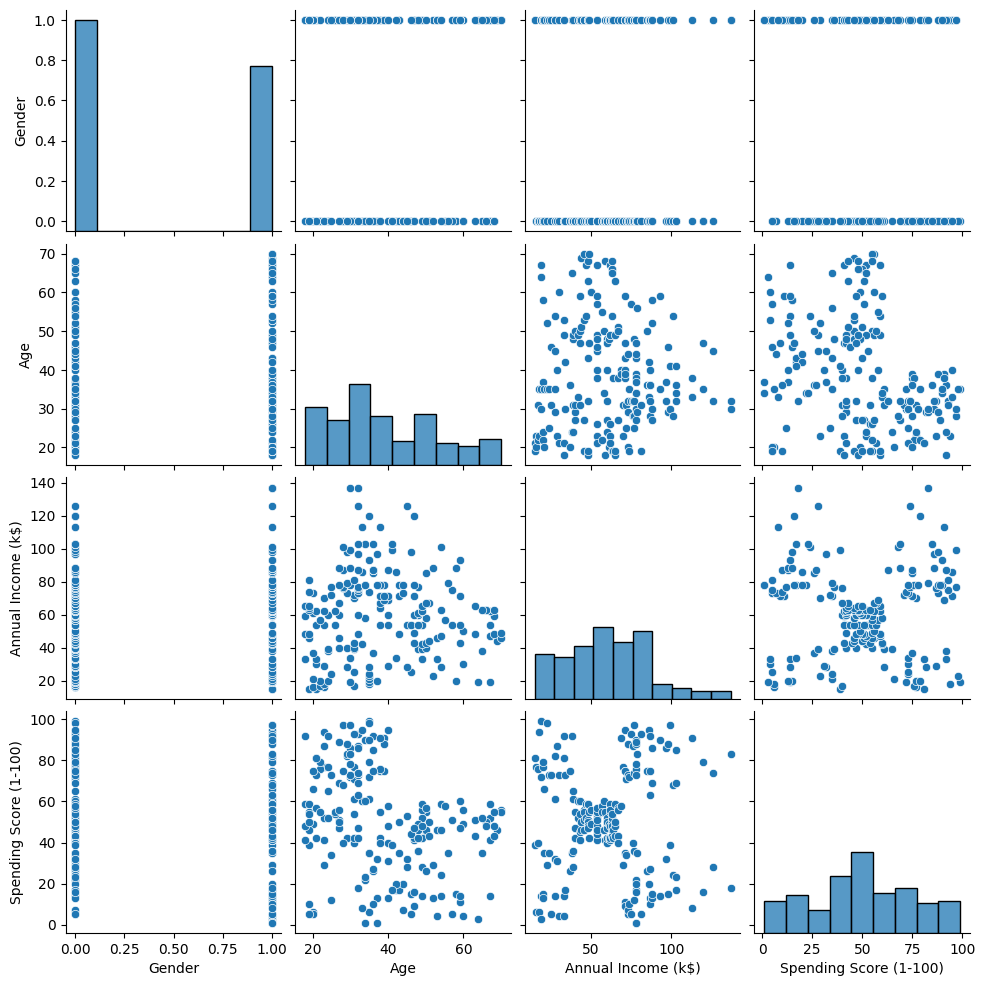

In [4]:
# 📉 Step 4: Exploratory Data Analysis
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

sns.pairplot(df)
plt.show()

In [5]:
# 📏 Step 5: Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


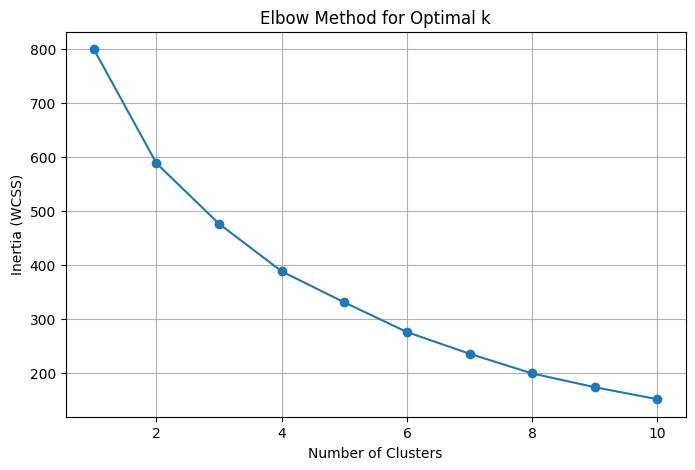

In [6]:
# 🔍 Step 6: Find Optimal Clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [7]:
# ✅ Step 7: Train KMeans with Optimal k (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

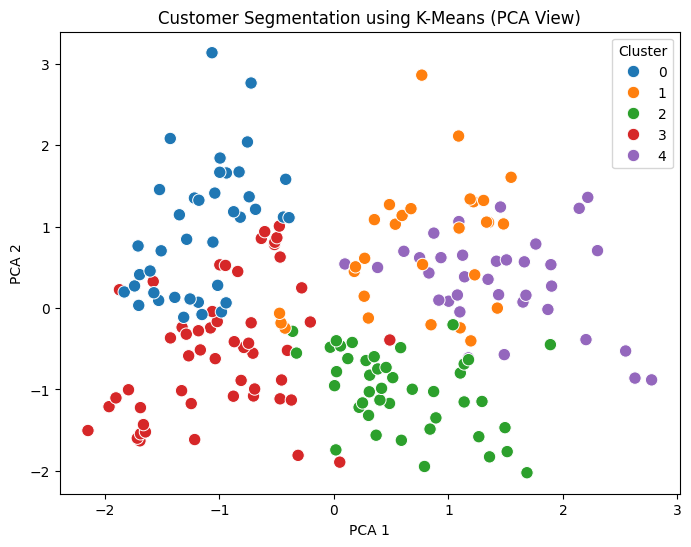

In [8]:
# 📊 Step 8: Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['Cluster'], palette='tab10', s=80)
plt.title('Customer Segmentation using K-Means (PCA View)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [9]:
# 📝 Step 9: Analyze Cluster Insights
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:\n")
print(cluster_summary)


Cluster Summary:

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.461538  32.692308           86.538462               82.128205
1        0.448276  36.482759           89.517241               18.000000
2        0.000000  49.813953           49.232558               40.069767
3        0.407407  24.907407           39.722222               61.203704
4        1.000000  55.714286           53.685714               36.771429


In [10]:
# 💾 Step 10: Save Clustered Data
df.to_csv('Clustered_Customers.csv', index=False)
print("\nClustered data saved as 'Clustered_Customers.csv'")



Clustered data saved as 'Clustered_Customers.csv'
